<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20aug%20own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import os
os.chdir('/content/drive/My Drive/Aug_PCB')
os.getcwd()

'/content/drive/My Drive/Aug_PCB'

In [3]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(5040, 300, 300, 3)
(5040,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [6]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(3376, 300, 300, 3)
(3376,)
(1664, 300, 300, 3)
(1664,)
4
float32
4
float32
4
float32


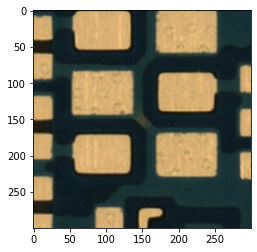

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [9]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376,)


In [10]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.20908627
0.20863052
3.790978 3.790978
-1.0021845 -1.0021845


In [11]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

Using TensorFlow backend.


[1. 0.]


In [12]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376, 2)


In [13]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))

x1 = Conv2D(300,(3,3),strides=(2,2) ,activation='relu')(input1)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(400,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)

x9= Conv2D(400,(2,2),strides=(1,1) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)
x12= AveragePooling2D((7, 7), strides=(1, 1))(x11)


o=keras.layers.Flatten()(x12)








out = keras.layers.Dense(2000,activation="relu")(o)
out = keras.layers.Dense(1024,activation="relu")(out)
out = keras.layers.Dense(100,activation="relu")(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 149, 300)     8400      
_________________________________________________________________
batch_normalization_1 (Batch (None, 149, 149, 300)     1200      
_________________________________________________________________
activation_1 (Activation)    (None, 149, 149, 300)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 300)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 400)       480400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 37, 37, 400)       1600

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [15]:
print(xtrain.shape)
print(ytrain.shape)

(3376, 300, 300, 3)
(3376, 2)


In [26]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, batch_size=20,epochs=8, verbose=1)

Epoch 1/8
3376/3376 [==============================] - 564s 167ms/step - loss: 0.0063 - accuracy: 0.9991
Epoch 2/8
3376/3376 [==============================] - 563s 167ms/step - loss: 0.0040 - accuracy: 0.9985
Epoch 3/8
3376/3376 [==============================] - 562s 167ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4/8
3376/3376 [==============================] - 562s 167ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 5/8
3376/3376 [==============================] - 566s 168ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 6/8
3376/3376 [==============================] - 565s 167ms/step - loss: 0.0089 - accuracy: 0.9976
Epoch 7/8
3376/3376 [==============================] - 562s 167ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 8/8
3376/3376 [==============================] - 562s 166ms/step - loss: 0.0026 - accuracy: 0.9997


In [27]:
model.evaluate(xtest,ytest)

1664/1664 [==============================] - 79s 47ms/step


[0.058956347103678405, 0.9849759340286255]

In [28]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98       822
     class 1       1.00      0.97      0.98       842

    accuracy                           0.98      1664
   macro avg       0.99      0.99      0.98      1664
weighted avg       0.99      0.98      0.98      1664



In [29]:
model.evaluate(xtrain,ytrain)

3376/3376 [==============================] - 159s 47ms/step


[0.0010025543270393174, 0.9997037649154663]

In [30]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      1698
     class 1       1.00      1.00      1.00      1678

    accuracy                           1.00      3376
   macro avg       1.00      1.00      1.00      3376
weighted avg       1.00      1.00      1.00      3376

